In [1]:
#练习1： 线性回归

#单变量线性回归 

#数据为城市人口与食品车利润的关系表

import pandas as pd

In [2]:
#加载数据 数据为城市人口与利润的对应关系
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
df.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [3]:
import numpy as np
print(np.any(df.isnull()) == True)

df.count() #发现数据完整,不需要进行数据清洗

False


population    97
profit        97
dtype: int64

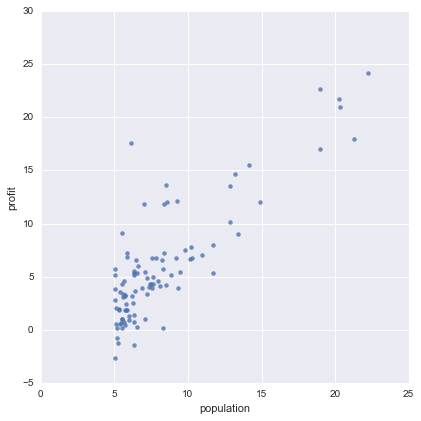

In [4]:
#画出散点图
%matplotlib inline

import seaborn as sns

sns.lmplot('population', 'profit', df, size=6, fit_reg=False)

In [5]:
#批量梯度下降

import sys 
sys.path.append('..')

#加载自己的ml模块
from ml import linear_regression as lr
from ml import  general as general


# 代价函数

<img style="float: left;" src="../img/linear_cost.png">


In [6]:
#得到feature和target


X = general.get_X(df) #get_X的处理为： 在feature前加了全为1的一列

print(X.shape, type(X))



y = general.get_y(df) #get_y的处理为：直接得到结果列 充当target

print(y.shape, type(y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [7]:
#初始化theta 预测函数的参数
theta = np.zeros(X.shape[1])


In [8]:
lr.cost(theta, X,y) #计算代价 

32.072733877455669

# 批量梯度下降算法

<img style="float: left" src="../img/linear_gradient.png">

In [9]:
iterations = 1500 #迭代总次数
alpha = 0.02  #步长

#运行批量梯度下降算法 cost_data 是每一次迭代的代价
final_theta, cost_data = lr.batch_gradient_decent(theta, X, y, iterations, alpha)

In [10]:
# 计算最终的代价
lr.cost(final_theta, X,y)

4.4769997149122185

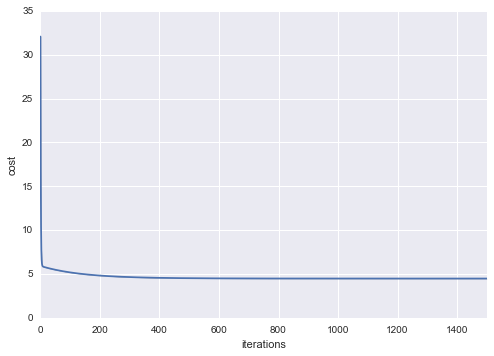

In [11]:
ax = sns.tsplot(cost_data, time=np.arange(iterations+1))
ax.set_xlabel('iterations')
ax.set_ylabel('cost')

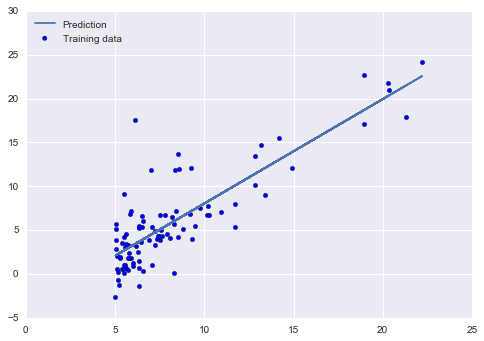

In [12]:
b = final_theta[0] 
m = final_theta[1]

import matplotlib.pyplot  as plt

plt.scatter(df.population, df.profit, label="Training data")
plt.plot(df.population, df.population*m + b, label="Prediction") # 预测的函数： y = m * x + b
plt.legend(loc=2)

In [13]:
##多变量线性回归  

#数据为房子 面积，卧室数 与 价格的关系表

data = pd.read_csv('ex1data2.txt', names=['square','bedrooms','price'])
data.head(10)

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [14]:
#特征缩放 Xn = (Xn-Un)/Sn
data = general.normalize_feature(data)
data.head(10)

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [15]:
##多变量梯度下降

X = general.get_X(data)
y = general.get_y(data)


In [16]:
#设置参数

theta = np.zeros(X.shape[1])

alpha = 0.01 
iterations = 1500 


In [17]:
final_theta, cost_data = lr.batch_gradient_decent(theta,X,y, iterations,alpha)


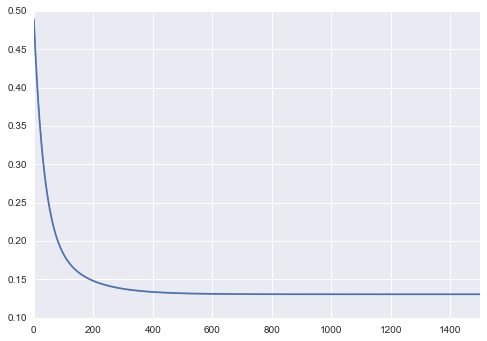

In [18]:
sns.tsplot(time=np.arange(len(cost_data)), data=cost_data)


In [19]:
#预测 

#element = [1,1650,3] # todo 需要对element进行特征缩放变换 才能得到真实的预测值
#price = lr.predict(element, final_theta)

#print(price)

In [20]:
##学习速率

## 迭代的次数 与 代价函数  在何时收敛 
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)


[  1.00000000e-05   3.00000000e-05   2.15443469e-04   6.46330407e-04
   4.64158883e-03   1.39247665e-02   1.00000000e-01   3.00000000e-01]


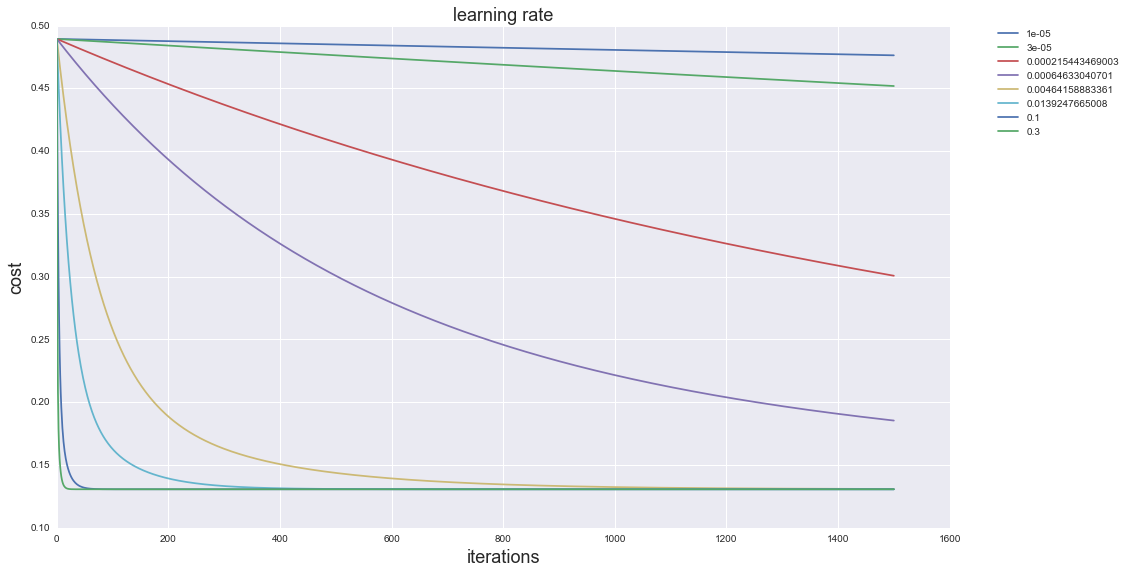

In [21]:
iterations=1500

fig, ax = plt.subplots(figsize=(16, 9))

# aipha 学习速率  
for alpha in candidate:
    _, cost_data = lr.batch_gradient_decent(theta, X, y, iterations, alpha)
    ax.plot(np.arange(iterations+1), cost_data, label=alpha)

ax.set_xlabel('iterations', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)

In [22]:
##正规方程   pinv(X'*X)*X'*y

#正规方程只能用于线性模型 
#正规方程不能用于 - 不可逆的矩阵 而产生这种矩阵的原因是 特征之间不独立，或者特征数量大于训练集数量


In [23]:
data = pd.read_csv('ex1data2.txt', names=['square','bedrooms','price'])


X = general.get_X(data)
y = general.get_y(data)


theta = np.zeros(X.shape[1])

theta = lr.normal_eqn(X, y)

theta

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])

In [24]:
#预测
element = [1,1650,3] 
price = lr.predict(element,theta)

price

293081.46433489537

In [25]:
# tensorflow 的优化器 比较 

# tensorflow 入门: https://github.com/xxg1413/Tensorflow/tree/master/tutorial

import tensorflow as tf


In [26]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
data = general.normalize_feature(raw_data)

data.head(10)

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [27]:
X_data = general.get_X(data)
y_data = general.get_y(data)

print(X_data.shape)
print(y_data.shape)

#注意：tensorflow不接受(47,)这种形式,需要reshape
y_data = general.get_y(data).reshape(len(X_data), 1)
print(X_data.shape)
print(y_data.shape)

(47, 3)
(47,)
(47, 3)
(47, 1)


In [28]:
iterations = 2000
alpha = 0.01


In [29]:
#优化器
optimizer_dict={'GD': tf.train.GradientDescentOptimizer, 
                'Adagrad': tf.train.AdagradOptimizer,
                'Adam': tf.train.AdamOptimizer,
                'Ftrl': tf.train.FtrlOptimizer,
                'RMS': tf.train.RMSPropOptimizer
               }
results = []
for name in optimizer_dict:
    res = lr.linear_regression(X_data, y_data, alpha, iterations, optimizer=optimizer_dict[name])
    res['name'] = name
    results.append(res) #保存所有优化器的结果
    


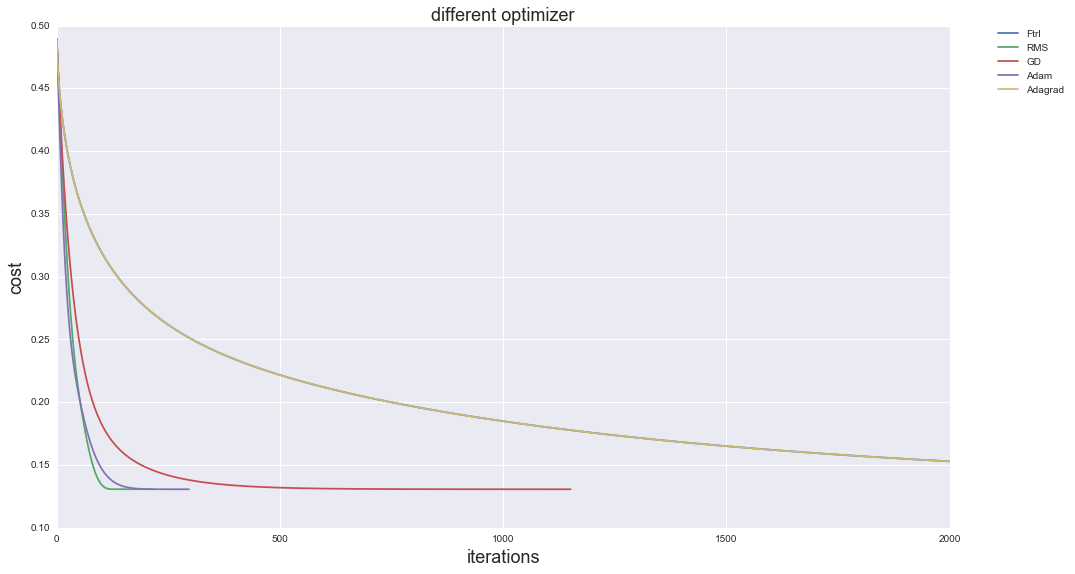

In [30]:
fig, ax = plt.subplots(figsize=(16, 9))

for res in results: 
    loss_data = res['loss']
    
    ax.plot(np.arange(len(loss_data)), loss_data, label=res['name'])

ax.set_xlabel('iterations', fontsize=18)
ax.set_ylabel('cost', fontsize=18)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('different optimizer', fontsize=18)

In [ ]:
#练习1 完